In [4]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os 
import tensorflow as tf
from PIL import Image
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [5]:
class MLP_gtzan:
    @staticmethod
    def train_test_split_gtzan(gtzan_path):
        X = []
        y = []
        le = LabelEncoder()
        for genre in os.listdir(gtzan_path):
            if not genre.startswith('.'):
                genre_path = os.path.join(gtzan_path, genre)
                for img_file in os.listdir(genre_path):
                        img_path = os.path.join(genre_path, img_file)
                        
                        X.append(img_path)
                        y.append(genre)
                        continue
        
        
        le.fit(y)
        genre_names = list(le.classes_)
        y = le.transform(y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
        print(X_train[1])
        return X_train, X_test, y_train, y_test, genre_names

    @staticmethod 
    def CNN_model():
        
        model = models.Sequential()
       
        model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape = (128, 128, 3)))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Conv2D(32, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Conv2D(32, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Flatten())
        model.add(layers.Dense(32, activation='relu'))
        return model
        
    @staticmethod
    def load_and_preprocess_images(image_paths, target_size=(128, 128)):
        data = []
        for path in image_paths:
            img = Image.open(path).convert('RGB')
            img = img.resize(target_size)
            data.append(np.array(img))
        return np.array(data) / 255.0  # Normalizacja [0,1]
    
    def CNN_train(X_train, X_test, y_train, y_test, genre_names, model):
        plt.figure(figsize=(10, 10))
        for i in range(20):
            plt.subplot(5, 5, i + 1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            
            # Wczytanie obrazu z dysku
            img = Image.open(X_train[i])
            plt.imshow(img)
            #
            plt.xlabel(genre_names[y_train[i]])
        plt.show()
        
        X_train = MLP_gtzan.load_and_preprocess_images(X_train)
        X_test = MLP_gtzan.load_and_preprocess_images(X_test)
        
        model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

        history = model.fit(X_train, y_train, epochs=35, 
                    validation_data=(X_test, y_test))
                # Wykres dokładności
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend()
        plt.grid(True)
        plt.show()

/home/ciona/projects/RCOLM/data/converted_data/GTZAN/jazz/jazz.00022_TS.png


/home/ciona/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-14 01:00:14.781534: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2025-08-14 01:00:14.781581: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:171] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-08-14 01:00:14.781585: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:176] retrieving CUDA diagnostic informati

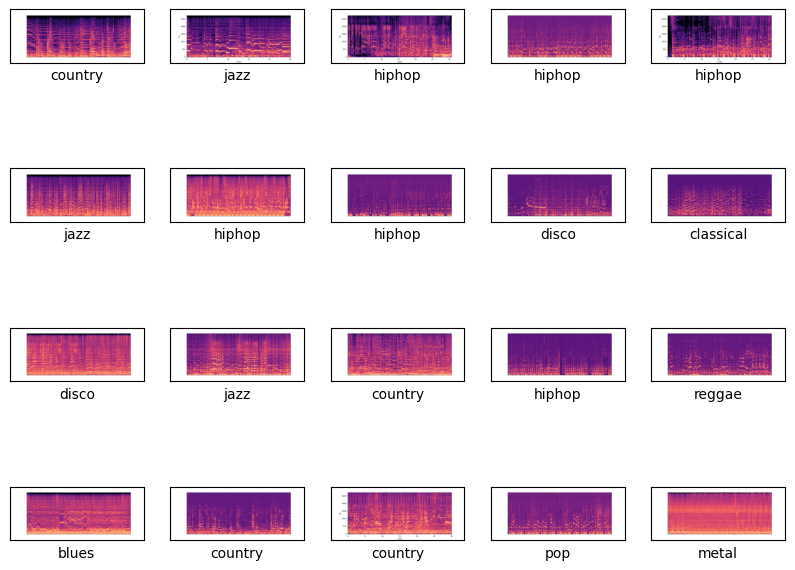

Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.1601 - loss: 2.9242 - val_accuracy: 0.2142 - val_loss: 2.7597
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2410 - loss: 2.7242 - val_accuracy: 0.2580 - val_loss: 2.6284
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.2869 - loss: 2.6041 - val_accuracy: 0.3511 - val_loss: 2.4811
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.3556 - loss: 2.4535 - val_accuracy: 0.3726 - val_loss: 2.4017
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4046 - loss: 2.3406 - val_accuracy: 0.4283 - val_loss: 2.3465
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4337 - loss: 2.2556 - val_accuracy: 0.4053 - val_loss: 2.2872
Epoch 7/20
10/80 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4133 - loss: 2.2780

KeyboardInterrupt: 

In [6]:
gtzan_path = "/home/ciona/projects/RCOLM/data/converted_data/GTZAN/"

X_train, X_test, y_train, y_test, genre_names = MLP_gtzan.train_test_split_gtzan(gtzan_path)
model = MLP_gtzan.CNN_model()
MLP_gtzan.CNN_train(X_train, X_test, y_train, y_test, genre_names, model)